# Lab 4 Part 2: SVM
Jonathan Ting

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# Read in the Stars.csv dataset using pandas
df = pd.read_csv('Stars.csv')
# Create the y label vector, which will be the Type column.
y = df['Type']
# The features we will be using for prediction are the columns:
    # Temperature
    # L
    # R
    # A_M
X = df[['Temperature', 'L', 'R', 'A_M']]
# Anywhere you are asked to create a train-test split on the data, you should use:
    # Fixed random state for the LinearSVC classifier throughout
    # Test size=0.2

## Question 2.1

Validation accuracy for max_iter=1000000 and C=0.01: 0.83
Validation accuracy for max_iter=1000000 and C=0.1: 0.92
Validation accuracy for max_iter=1000000 and C=1: 0.96
Validation accuracy for max_iter=1000000 and C=10: 1.00
Validation accuracy for max_iter=1000000 and C=100: 1.00
Validation accuracy for max_iter=1000000 and C=1000: 1.00
Validation accuracy for max_iter=100000 and C=0.01: 0.83
Validation accuracy for max_iter=100000 and C=0.1: 0.92
Validation accuracy for max_iter=100000 and C=1: 0.96
Validation accuracy for max_iter=100000 and C=10: 1.00
Validation accuracy for max_iter=100000 and C=100: 1.00
Validation accuracy for max_iter=100000 and C=1000: 1.00
Validation accuracy for max_iter=10000 and C=0.01: 0.83
Validation accuracy for max_iter=10000 and C=0.1: 0.92
Validation accuracy for max_iter=10000 and C=1: 0.96
Validation accuracy for max_iter=10000 and C=10: 1.00


Validation accuracy for max_iter=10000 and C=100: 1.00
Validation accuracy for max_iter=10000 and C=1000: 1.00
Validation accuracy for max_iter=1000 and C=0.01: 0.83
Validation accuracy for max_iter=1000 and C=0.1: 0.92
Validation accuracy for max_iter=1000 and C=1: 0.96
Validation accuracy for max_iter=1000 and C=10: 1.00
Validation accuracy for max_iter=1000 and C=100: 1.00
Validation accuracy for max_iter=1000 and C=1000: 1.00


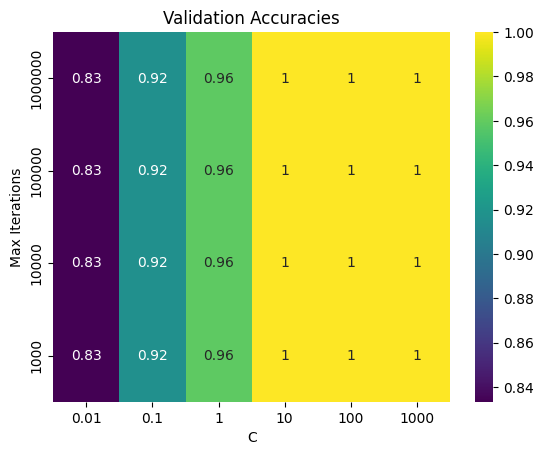

In [8]:
# Finding hyperparameters.
# Create a validation set and subtraining set from the training set
    # (a single validation set, rather than KFolds)
    # 0.125 of the training set serves as the validation set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_subtrain, X_valid, y_subtrain, y_valid = train_test_split(X_train, y_train, test_size=0.125, random_state=42)
# Fit the LinearSVC classifier on the training set.
max_iter = [1000000, 100000, 10000, 1000]
C = [0.01, 0.1, 1, 10, 100, 1000]

# Create a numpy array to hold the validation accuracies for each combination of max_iter and C.
df_out = np.zeros((len(max_iter), len(C)))

# Evaluate on the validation set for all combinations of:
# max iter=[1000, 10000, 100000, 1000000]
for i in max_iter:
    # C=[0.01, 0.1, 1, 10, 100, 1000]
    for j in C:
        svc = make_pipeline(StandardScaler(), LinearSVC(dual="auto", random_state=42, max_iter=i, C=j))
        svc.fit(X_subtrain, y_subtrain)
        # Print the validation accuracy for each combination
        svc_score = svc.score(X_valid, y_valid)
        print(f'Validation accuracy for max_iter={i} and C={j}: {svc_score:.2f}')
        # Store the validation accuracy in the numpy array.
        df_out[max_iter.index(i)][C.index(j)] = svc_score
# Show a heatmap comparing the validation accuracies across the combinations.
# (include a colorbar)
sns.heatmap(df_out, annot=True, cmap='viridis')
plt.xlabel('C')
plt.ylabel('Max Iterations')
plt.xticks(np.arange(len(C))+0.5, C)
plt.yticks(np.arange(len(max_iter))+0.5, max_iter)
plt.title('Validation Accuracies')
plt.show()


## Question 2.2

In [9]:
# Use the maximum iterations and C values you found to perform best to inform how you create your LinearSVC().
svc = make_pipeline(StandardScaler(), LinearSVC(dual="auto", random_state=42, max_iter=1000, C=100))
# Fit on the whole training set.
svc.fit(X_train, y_train)

# Compute and print the training and testing accuracy for the Stars dataset.
svc_score_train = svc.score(X_train, y_train)
svc_score_test = svc.score(X_test, y_test)
print(f'Training accuracy: {svc_score_train:.2f}, Testing accuracy: {svc_score_test:.2f}')

Training accuracy: 0.99, Testing accuracy: 0.98
